In [1]:
import pandas as pd

df = pd.read_csv('c:/data/coin/market-price.csv')
df

,Timestamp,market-price
0,2021-10-18 00:00:00,61546.21
1,2021-10-19 00:00:00,61971.59
2,2021-10-20 00:00:00,64287.64
3,2021-10-21 00:00:00,66063.56
4,2021-10-22 00:00:00,62354.86
...,...,...
56,2021-12-13 00:00:00,50117.25
57,2021-12-14 00:00:00,46757.09
58,2021-12-15 00:00:00,48392.79
59,2021-12-16 00:00:00,48884.66


<AxesSubplot:>

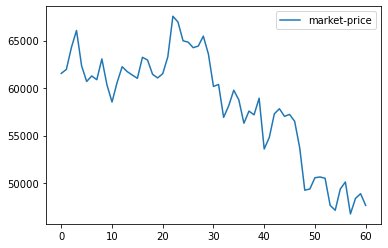

In [2]:
%matplotlib inline
df.plot()

<AxesSubplot:>

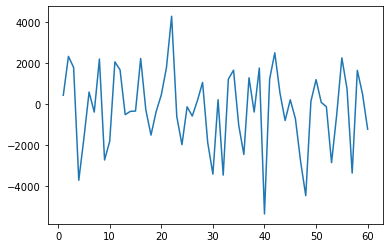

In [3]:
#1차분 차분 데이터
diff1 = df['market-price'].diff(periods=1).iloc[1:]
diff1.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

#로그 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1 = np.log(df['market-price']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-7.655575803936232, 1.7426891889269193e-11, 1, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, -187.76931840945872)
ADF Statistic: -7.655576
p-value: 0.000000


In [5]:
from pmdarima.arima import auto_arima
model = auto_arima(df['market-price'], suppress_warnings=True)
model

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
#학습용,검증용 구분
n = int(df.shape[0]*.8)
train =df[:n]
test = df[n:]
print(len(df['market-price']))
print(train['market-price'].values)
print(test['market-price'].values)

61
[61546.21 61971.59 64287.64 66063.56 62354.86 60697.06 61277.28 60884.18
 63070.54 60345.17 58538.49 60587.09 62249.18 61731.29 61373.44 61029.5
 63241.11 62954.86 61441.83 61072.32 61516.31 63293.22 67562.17 66954.11
 64976.73 64838.81 64254.67 64420.94 65468.75 63584.25 60172.26 60381.35
 56921.34 58133.02 59777.98 58755.9  56301.52 57578.22 57187.54 58935.45
 53588.21 54801.15 57292.28 57828.45 57025.79 57229.76 56508.48 53713.84]
[49253.86 49380.43 50564.63 50645.41 50511.12 47659.68 47137.46 49379.67
 50117.25 46757.09 48392.79 48884.66 47658.38]


In [11]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train['market-price'], order=(0,1,0)).fit()

In [12]:
#예측값

fore = model.forecast(steps=5)
print(fore)

(array([53547.19382979, 53380.54765957, 53213.90148936, 53047.25531915,
       52880.60914894]), array([1907.09090316, 2697.03381993, 3303.17833893, 3814.18180632,
       4264.38489874]), array([[49809.36434435, 57285.02331523],
       [48094.45850743, 58666.63681172],
       [46739.79091055, 59688.01206817],
       [45571.59634827, 60522.91429003],
       [44522.56833119, 61238.64996668]]))


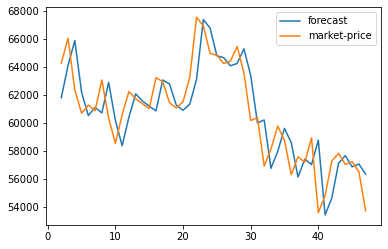

In [13]:
import matplotlib.pyplot as plt

#실제값과 예측값
model.plot_predict()
plt.show()

[49253.86 49380.43 50564.63 50645.41 50511.12 47659.68 47137.46 49379.67
 50117.25 46757.09 48392.79 48884.66 47658.38]
[53547.19382979 53380.54765957 53213.90148936 53047.25531915
 52880.60914894 52713.96297872 52547.31680851 52380.6706383
 52214.02446809 52047.37829787 51880.73212766 51714.08595745
 51547.43978723]


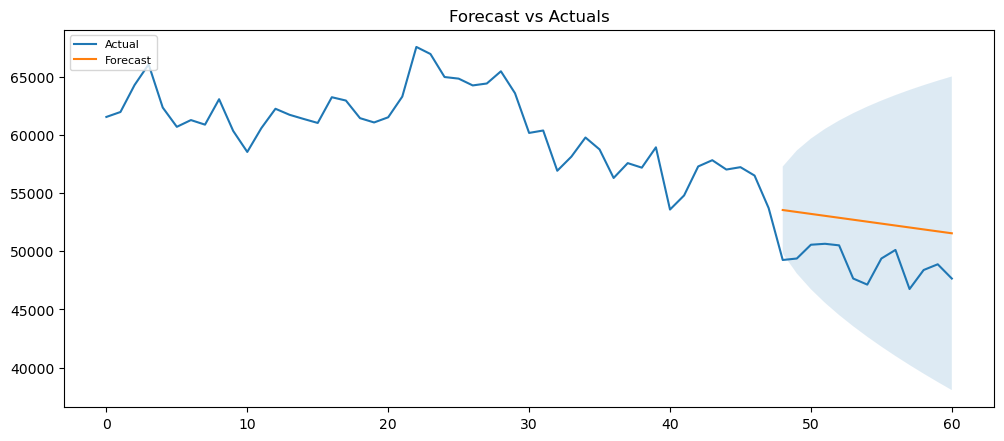

In [14]:
#예측값
fc, se, conf = model.forecast(steps=len(test))
print(test['market-price'].values)
print(fc)
fc_sereies = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:, 0], index=test.index)
upper = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['market-price'], label='Actual')
plt.plot(fc_sereies, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()